### Solución tarea II - Introducción a la inteligencia artificial 
**Grupo 1**

**Integrantes:**

*   Acevedo, Juan
*   Ahumada, Santiago
*   Alvarez, Saul
*   Babativa, Edgar




#Punto 1

Dados $N$ puntos en el plano, el objetivo de un agente viajero es visitar todos los puntos (y
regresar a casa) mientras se mantenga la distancia recorrida tan corta como sea posible.
Implemente las siguientes tres estrategias heurísticas:
*   Random-restart hill-climbing
*   Simulated annealing
*   Genetic algorithms

para encontrar una solución (no necesariamente optima) al problema del agente viajero.

Para la evaluación del problema genere N puntos aleatorios en el círculo, y estudie:
- El desempeño computacional (tiempos de ejecución) en términos del tamaño del
problema $N$.
- La distancia total mínima en términos del tamaño del problema $N$.

## Solución

### Preliminares

In [ ]:
import random 
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
import networkx as nx

''' Generar un conjunto de N puntos (ciudades) dentro del círculo unitario '''

#N=random.randint(10,100)
N=200
puntos=[]
# Semilla para que el problema sea reproducible
random.seed(1) 
for i in range(N): 
  x = -1+2*random.random() # Se determina la coordenada en x como un número aleatorio entre -1 y 1
  up_bound= np.sqrt(1-x**2) 
  low_bound = -np.sqrt(1-x**2)
  y = low_bound+(up_bound-low_bound)*random.random() # La coordenada en y se encuentra dentro de los límites del círculo definidos para cada x
  puntos.append((x,y)) # Se agrega la tupla a la lista de puntos
 


''' Matriz de distancias'''
# distancia euclidiana
dM = np.zeros((N,N))
for i,j in product(range(N),range(N)):
  dM[i][j]=np.sqrt((puntos[i][0]-puntos[j][0])**2+(puntos[i][1]-puntos[j][1])**2)
print(N)


''' Grafo '''
# En a sintaxis de la librería NetworkX las posiciones de los puntos se deben guardar en un diccionario
posiciones = { i:punto for i,punto in enumerate(puntos)} 

# Creacion del grafo
G=nx.Graph()
G.add_nodes_from(list(range(len(posiciones))))

# Plotear Grafo
plt.figure(figsize=(10,10))
nx.draw_networkx(G,posiciones, node_size = 50, nodelist = range(len(puntos)), node_color = 'b', with_labels=False)
circle1=plt.Circle((0,0),1,color='r', fill=False)
fig = plt.gcf() 
fig.gca().add_artist(circle1)
plt.show()


Una solución (tour) es un vector ordenado de N componentes, donde la posición de cada componente indica el orden en que la ciudad es visitada por el viajero. La función objetivo consiste en calcular la distancia total recorrida en la ruta (tour), esto es equivalente a sumar la distancia entre cada par de puntos adyacentes en el vector y el recorrido de vuelta al punto de partida.



In [ ]:
# Función objetivo
def FO(tour):
  FO = 0
  for i in range(len(tour)-1):
    FO += dM[tour[i]][tour[i+1]]
  # recorrido de vuelta al punto de partida
  FO += dM[tour[0]][tour[-1]]
  return FO

# Función para graficar una ruta o tour
def plot_tour(tour, distancia=None):
  # Lista con las aristas del grafo
  edges = []
  for k in range(len(tour)-1):
    edges.append((tour[k],tour[k+1]))
  edges.append((tour[0],tour[-1]))
  # Se incluyen los ejes en el grafo
  G.add_edges_from(edges)
  # Imprimir grafo
  plt.figure(figsize=(10,10))
  nx.draw_networkx(G, posiciones, node_size = 50, node_color = 'b', with_labels=False)
  # Círculo unitario rojo
  circle1=plt.Circle((0,0),1,color='r', fill=False)
  fig = plt.gcf() 
  fig.gca().add_artist(circle1)
  # Distancia recorrida
  if distancia!=None:
    plt.text(-1,1,'{:.3f}'.format(distancia), fontsize=20)
  # Mostrar gráfica con todos los elementos anteriores
  plt.show()  
  G.remove_edges_from(edges)


[130 137  54 199 129  12  93 169 102   9  18  73 194 142 148 188 147 183
 179 127 178 153 154  60 161 133 160   8  82 155 156 192 164 108 158 120
 195  25  38 140 189  51 141 112 134 138 193  87  21  58  47  61 162  75
   3 113 122 185  23  27 121  30 117 174  32  77  41 173 182 157  37 114
 168  28  39  33  71   6 123 105 124  53 126  14 144  44 190  85  45 165
 104   4 145  92  66  97 103  11  13   5   0 184 135 150   2 152 181  49
  76 146 172 131 118  26 110   1  64  83  48  98  90 170 166  55  16 125
  70  56  36 159  43 136 198   7 186 171  63  62 149  79  20 106 109  91
 187  29 176  89 177 101  35  34  94  88  22 175 143  19  52  69  81 119
  15 197  99  65 139  78 196  86  50 151  84 115  42 180  31 100 163 116
  95 191  68 132  72  10  80  17  74  67 111 167 128 107  46  40  24  96
  59  57]


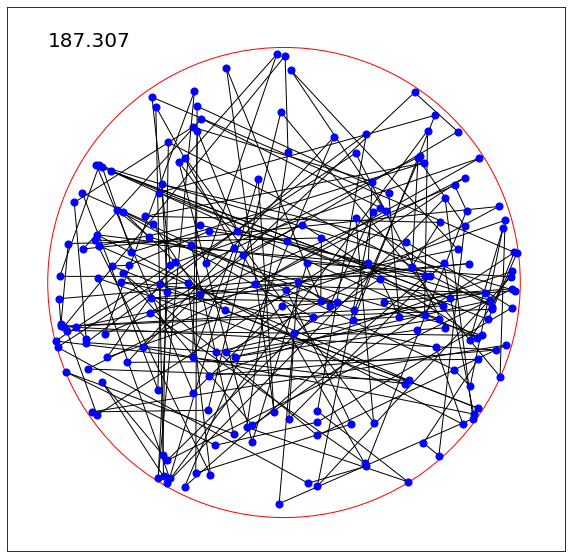

In [ ]:
'''Ejemplo: Graficar un tour o ruta aleatoria '''

tour_0 = np.random.permutation(range(N)) 
print(tour_0)
F_0 = FO(tour_0)
plot_tour(tour_0, F_0)

In [ ]:
from random import randint

''' Operadores de Transformacion de vectores ''' 

def swap(w, i, j):
  v = w.copy()
  v[i],v[j] = v[j],v[i]
  return v

def rand_swap(w):
  i,j = random.randint(0,len(w)-1) , random.randint(0,len(w)-1)
  return swap(w, i, j)

def reverse_subseq( w, start, length):
  v = w.copy()
  v[start:start+length] = w[start:start+length][::-1]
  return v

def rand_reverse(w):
  start = random.randint(0,len(w)-4)  
  length = random.randint(3,len(w)-start) # La longitud de la subsucesión es mínimo 3
  return reverse_subseq(w,start,length)

def insertion(w, i, j): #Inserta el indice i en el j y corre la cola restante
  v=list(w.copy())
  temp = v.pop(i)
  v.insert(j,temp)
  return v

def rand_insertion(w):
  i,j = random.randint(0,len(w)-1) , random.randint(0,len(w)-1)
  return insertion(w,i,j)

def rand_transformation(w):
  transformations = [ rand_swap , rand_reverse, rand_insertion ] 
  return random.choice(transformations)(w)



In [ ]:
from random import randint

''' Ejemplo de Hill Climbing Individual usando únicamente Swaps aleatorios '''

np.random.seed(1)
tour_0 = np.random.permutation(range(N)) 
F_0 = FO(tour_0)
plot_tour(tour_0, F_0)

random.seed(0)
tour = tour_0
FO_t = F_0
for iter in range(100000):
  i,j = randint(0,N-1) , randint(0,N-1)
  tour_new = swap(tour, i, j)
  FO_new = FO(tour_new)
  if FO_new < FO_t :
    tour = tour_new
    FO_t = FO_new

plot_tour(tour, FO_t) 

### Random-restart hill-climbing

optimizacion con random restart
f([162, 35, 90, 174, 101, 167, 128, 6, 198, 123, 19, 92, 61, 129, 63, 170, 111, 172, 168, 145, 141, 147, 152, 20, 47, 46, 176, 58, 93, 169, 42, 39, 136, 86, 83, 197, 12, 138, 32, 149, 44, 98, 36, 163, 64, 117, 166, 16, 57, 77, 96, 69, 99, 158, 146, 81, 134, 79, 0, 109, 127, 60, 8, 156, 183, 49, 40, 48, 18, 88, 68, 122, 5, 184, 125, 182, 85, 116, 144, 26, 177, 107, 115, 132, 137, 113, 178, 191, 29, 157, 126, 23, 37, 103, 24, 112, 22, 59, 120, 91, 108, 33, 74, 31, 148, 180, 196, 3, 105, 54, 194, 55, 43, 52, 199, 82, 192, 25, 121, 7, 80, 94, 11, 154, 106, 45, 9, 173, 41, 1, 187, 195, 153, 159, 78, 142, 34, 2, 14, 27, 165, 87, 175, 100, 164, 76, 66, 171, 190, 110, 140, 75, 56, 84, 131, 28, 13, 30, 139, 119, 50, 72, 130, 135, 10, 70, 124, 151, 62, 21, 67, 102, 4, 118, 133, 15, 150, 185, 155, 104, 38, 189, 65, 71, 97, 179, 143, 17, 89, 186, 160, 193, 161, 181, 114, 53, 95, 73, 51, 188]) = 38.222836


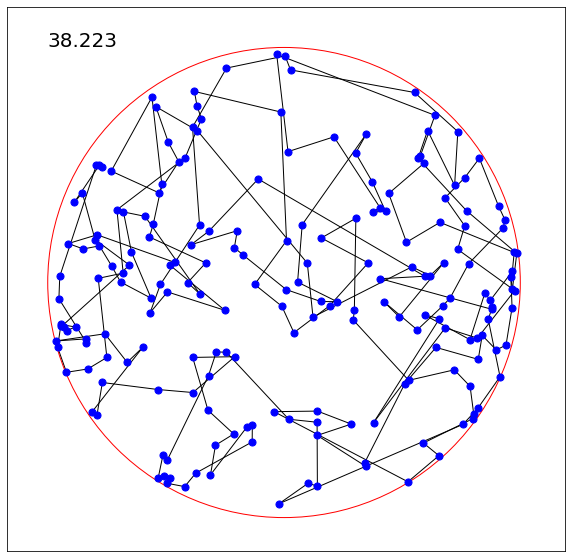

In [ ]:
from random import randint
import numpy as np
def hillclimbing(start_pt, n_iter):
  tour_0 = start_pt
  #print(tour_0)
  F_0 = FO(tour_0)
  #print('Distancia recorrida: ', F_0)
  #plot_tour(tour_0)


  random.seed(0)
  tour = tour_0
  FO_t = F_0
  for n in range(n_iter):
    tour_new = rand_transformation(tour) # Transformación del vector
    FO_new = FO(tour_new)
    if FO_new < FO_t :
      tour = tour_new
      FO_t = FO_new
 # print('\n \n Distancia recorrida: ', FO_t, iter)
  #plot_tour(tour) 
  return(tour,FO_t)

# hill climbing with random restarts algorithm
import random
def random_restarts( n_restarts):
  best, best_eval = None, 100000 
	# enumerate restarts
  for n in range(n_restarts):
    
      # generate a random initial point for the search
    start_pt = None
    while start_pt is None :
      start_pt = np.random.permutation(range(N))  
    # perform a stochastic hill climbing search
    solution, solution_eval = hillclimbing(start_pt,n_iter)
    
    # check for new best
    if solution_eval < best_eval:
      best, best_eval = solution, solution_eval
    #	print('Restart %d, best: f(%s) = %.5f' % (n, best, best_eval))
  return [best, best_eval]

# seed the pseudorandom number generator
random.seed(1)
# define the total iterations
n_iter = 10000
# total number of random restarts
n_restarts = 10
# perform the hill climbing search
bestrr, score = random_restarts( n_restarts)
print('optimizacion con random restart')
print('f(%s) = %f' % (bestrr,score))  
plot_tour(bestrr, score)  

### Simulated annealing

In [ ]:
#We keep the same objective function as hill_climbing

def sim_an(start_pt, n_inter):
  temp=100
  final_temp=0.00000000000001
  cooling_rate=0.9

  tour_0 = start_pt
  F_0 = FO(tour_0)
  random.seed(0)
  tour = tour_0
  FO_t = F_0
  
  for _ in range(10*n_inter):
    tour_new = rand_transformation(tour) # Transformación del vector
    FO_new = FO(tour_new)
    delta_e = FO_new - FO_t
    if delta_e < 0:
      tour = tour_new
      FO_t = FO_new
    else:
      if temp >= final_temp:
        prob = np.exp(delta_e/temp)
        x = random.choice(np.arange(0,1,0.01))
        if x < prob:
          tour = tour_new
          FO_t = FO_new 
    
    temp = cooling_rate*temp
  return(tour,FO_t)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


La solucion encontrada es [78, 94, 68, 88, 29, 122, 191, 5, 184, 18, 48, 80, 40, 112, 24, 107, 47, 177, 58, 59, 46, 120, 176, 169, 91, 93, 144, 26, 116, 85, 182, 115, 125, 103, 20, 37, 147, 152, 132, 141, 145, 168, 11, 154, 23, 126, 106, 172, 137, 157, 113, 170, 178, 19, 92, 51, 123, 63, 1, 41, 111, 45, 173, 174, 9, 101, 90, 128, 167, 6, 61, 129, 188, 162, 35, 73, 198, 34, 49, 142, 55, 195, 187, 43, 183, 194, 52, 2, 14, 199, 82, 192, 158, 44, 149, 57, 30, 66, 117, 171, 166, 21, 151, 124, 190, 67, 102, 15, 150, 114, 155, 12, 16, 197, 138, 99, 69, 32, 53, 95, 185, 104, 71, 97, 179, 38, 189, 181, 186, 160, 193, 89, 17, 143, 65, 161, 118, 4, 133, 110, 140, 75, 62, 13, 56, 28, 131, 84, 70, 10, 36, 163, 64, 139, 98, 50, 119, 76, 77, 96, 81, 146, 25, 121, 83, 109, 134, 127, 164, 60, 0, 130, 72, 135, 8, 79, 86, 156, 100, 175, 87, 136, 108, 39, 42, 165, 7, 27, 159, 54, 33, 74, 105, 3, 196, 22, 180, 31, 148, 153] cuya distancia total asociada es 21.12014964994726


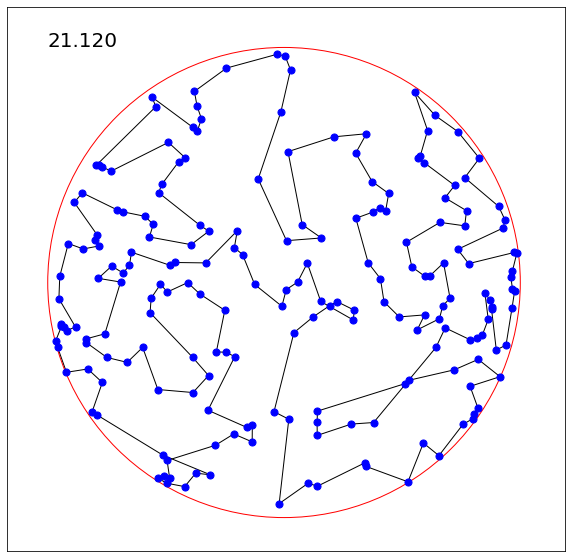

In [ ]:
start_point = np.random.permutation(range(N)) 
sol, dist = sim_an(start_point,10000)
print('La solucion encontrada es '+str(sol)+' cuya distancia total asociada es '+str(dist))
plot_tour(sol, dist)

### Genetic algorithm

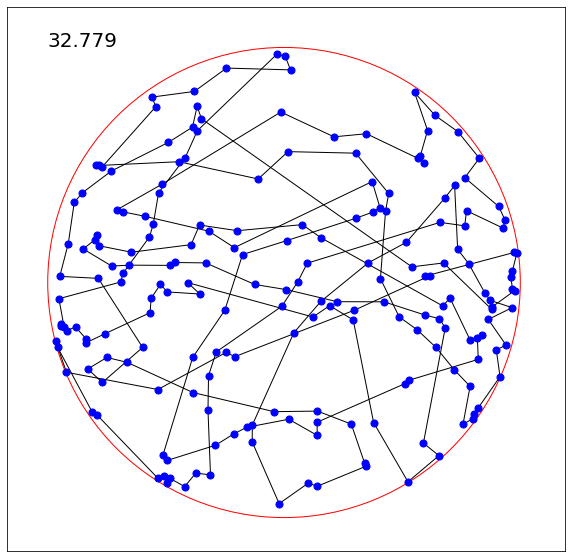

In [ ]:
''' Algoritmo genético elitista aplicando llaves aleatorizadas'''

class GeneticAlgorithm():
  def __init__(self,dM, elite_proportion, mutant_proportion, pop_factor, num_gen):
    # Número de ciudades
    self.N = dM.shape[0]
    # Matriz de distancias
    self.dM = dM
    # Tamaño de población. El tamaño de la población es diractamente proporcional al número de puntos, con proporción pop_factor. 
    self.pop_size = N*pop_factor 
    # Número de individuos élite y mutantes de acuerdo al tamaño de la población y la proporción de elites y mutantes.
    self.num_elites = int(np.ceil(self.pop_size*elite_proportion))
    self.num_mutants = int(np.ceil(self.pop_size*mutant_proportion))
    # Número de generaciones
    self.num_gen = num_gen

  def decode(self, individuo):
    return np.argsort(individuo)
  
  def FO(self, tour):
    FO = 0
    for i in range(len(tour)-1):
      FO += self.dM[tour[i]][tour[i+1]]
    # recorrido de vuelta al punto de partida
    FO += self.dM[tour[0]][tour[-1]]
    return FO

  def fitness(self,individuo):
    return self.FO(self.decode(individuo))

  def GeneratePopulation(self):
    # Crear llaves aleatorias (cada juego de llaves aleatorias es un individuo)
    self.population = [[random.random() for _ in range(self.N)] for _ in range(self.pop_size)]
    self.Fitness_pop = [ self.fitness(individual) for individual in self.population]
    order = np.argsort(self.Fitness_pop)
    self.population = np.array(self.population)[order]
    self.Fitness_pop.sort()

  def CrossOver(self):
    self.elites = self.population[:int(self.num_elites)]
    self.new_pop = []
    for _ in range(self.pop_size):
      father1 = random.choice(self.elites)
      father2 = random.choice(self.population)
      son = [] 
      for i in range(len(father1)):
        if random.random() >= 0.7:
          son.append(father2[i])
        else:
          son.append(father1[i])
      self.new_pop.append(son)

  def Mutation(self):
    idx_candidates = random.sample(range(len(self.new_pop)) , self.num_mutants)

    for can in idx_candidates: 
      allele = random.randint(0,self.N-1)
      self.new_pop[can][allele] = random.random() 

    self.fitness_new_pop = [self.fitness(individual) for individual in self.new_pop]

  def Replace(self):
    aux_pop = np.vstack(( self.elites, self.new_pop ))
    Fitness_aux = np.append( self.Fitness_pop[:self.num_elites] , self.fitness_new_pop)       
    order = np.argsort(Fitness_aux)
    self.population = aux_pop[order][:self.pop_size]
    self.Fitness_pop = Fitness_aux[order][:self.pop_size]

  def Optimize(self): 
    self.GeneratePopulation()
    for i in range(self.num_gen):
      self.CrossOver()
      self.Mutation()
      self.Replace()

    self.sol_opt = self.decode(self.population[0])
    self.FO_opt = self.Fitness_pop[0]


GA = GeneticAlgorithm(dM, 0.3, 0.3, 3, 1000)
GA.Optimize()
plot_tour(GA.sol_opt, GA.FO_opt)

## Evaluación:



### Instancias para evaluar el Desempeño computacional:

In [ ]:
import time
import pandas as pd

''' Generar Instancias ''' 

num_nodes = [10, 20, 50, 100, 500]

def GenerateInstance(N):
  random.seed(42) 
  for i in range(N): 
    x = -1+2*random.random() # Se determina la coordenada en x como un número aleatorio entre -1 y 1
    up_bound= np.sqrt(1-x**2) 
    low_bound = -np.sqrt(1-x**2)
    y = low_bound+(up_bound-low_bound)*random.random() # La coordenada en y se encuentra dentro de los límites del círculo definidos para cada x
    puntos.append((x,y)) # Se agrega la tupla a la lista de puntos

  ''' Matriz de distancias'''
  # distancia euclidiana
  dM = np.zeros((N,N))
  for i,j in product(range(N),range(N)):
    dM[i][j]=np.sqrt((puntos[i][0]-puntos[j][0])**2+(puntos[i][1]-puntos[j][1])**2)

  return dM

Distance_Matrices = [ GenerateInstance(N) for N in num_nodes]


### Hill climbing 

In [ ]:
results_hc = []
for d_matrix in Distance_Matrices: 
  start = time.time()
  pt, dist = hillclimbing(np.random.permutation(d_matrix, 10000))
  results_hc.append([len(d_matrix), dist])

df_hc = pd.DataFrame(results_hc, columns=['N','Distancia_optima'])

df_hc

TypeError: ignored

In [ ]:
from networkx.algorithms.assortativity.mixing import degree_mixing_matrix

def hillclimbing(dMatrix, n_iter):

  def f(tour):
    f = 0
    for i in range(len(tour)-1):
      f += dMatrix[tour[i]][tour[i+1]]
    f += dMatrix[tour[0]][tour[-1]]
    return f
  
  num = dMatrix.shape[0]
  tour_0 = np.random.permutation(num)
  f_0 = f(tour_0)

  random.seed(0)
  tour = tour_0
  f_t = f_0
  for n in range(n_iter):
    tour_new = rand_transformation(tour) 
    f_new = f(tour_new)
    if f_new < f_t :
      tour = tour_new
      f_t = f_new

  return(tour,f_t)


results_hc = []
for d_matrix in Distance_Matrices: 
  start = time.time()
  pt, dis = hillclimbing(d_matrix, 10000)
  comp_time = (time.time() - start)/60  #Tiempo computacional en minutos
  results_hc.append([len(d_matrix), comp_time, dis])

df_hc = pd.DataFrame(results_hc, columns=['N','Tiempo_Computacional','Distancia_optima'])

df_hc

###Simulated annealing

###Algoritmo Genético


In [ ]:

results = []
for d_matrix in Distance_Matrices: 
  start = time.time()
  GA = GeneticAlgorithm(d_matrix, 0.3, 0.3, 3, 1000)
  GA.Optimize()
  comp_time = (time.time() - start)/60  #Tiempo computacional en minutos
  results.append([len(d_matrix), comp_time, GA.FO_opt])

df_GA = pd.DataFrame(results, columns=['N','Tiempo_Computacional','Distancia_optima'])

df_GA

In [ ]:
df_GA.plot( x='N', y='Tiempo_Computacional', style='o-')
plt.ylabel('minutos')
plt.show()

#### Distancia total mínima:

#Punto 2

Se quieren poner 25 departamento en 25 diferentes localizaciones de un centro comercial,
con cinco espacios en cada piso (ver figura 1). El objetivo es minimizar el costo entre los
departamentos puestos. El costo es flujo * distancia_linea_recta, donde los flujos y las
distancias son simétricos entre pares de departamentos. Las distancias y los flujos se
encuentran en el archivo nug25.dat.

Encuentre una solución al problema utilizando Genetic Algorithms. (Hint: Este problema es
una instancia del QAP (Quadratic assignment problem) y su solución exacta es 3744 si se
consideran flujos dobles.

## Solución


In [ ]:
from tabulate import tabulate
import numpy as np
distancias = np.array(np.genfromtxt ('sample_data\db1.dat'))
print(" MATRIZ DE distancias")
print(tabulate(distancias, tablefmt='fancy_grid'))
flujos = np.array(np.genfromtxt ('sample_data\db2.dat'))
print(" MATRIZ DE FLUJOS")
print(tabulate(flujos, tablefmt='fancy_grid'))

OSError: ignored

Una solución es un vector $v = (v_0, v_1, ... , v_{24}) $ en donde la posición de la componente representa la localización del departamento y el valor la instalación. 

In [ ]:

# Funcion objetivo
def F(vect):
  F = 0
  for i in range(len(vect)-1):
    for j in range(len(vect)-1):
      if i!=j:
        F += distancias[i][j] * 2 *flujos[vect[i]][vect[j]] # Con flujo doble
  return F



In [ ]:
F(np.arange(25))

8368.0

In [ ]:
F(np.random.permutation(25))

8992.0

In [ ]:
import time
def HillClimbing(start_pt, n_iter):
  vector_0 = start_pt
  F_0 = F(vector_0)

  random.seed(0)
  vector = vector_0
  F_t = F_0
  for n in range(n_iter):
    vector_new = rand_transformation(vector) # Transformación del vector
    F_new = F(vector_new)
    if F_new < F_t :
      vector = vector_new
      F_t = F_new
  return(vector,F_t)

def random_restarts( n_restarts):
  best, best_eval = None, float('inf')
	# enumerate restarts
  for n in range(n_restarts):
    # generate a random initial point for the search
    start_pt = np.random.permutation(range(25))  
    # perform a stochastic hill climbing search
    solution, solution_eval = HillClimbing(start_pt, 1000000)
    # check for new best
    if solution_eval < best_eval:
      best, best_eval = solution, solution_eval
    #	print('Restart %d, best: f(%s) = %.5f' % (n, best, best_eval))
  
  return [best, best_eval]

start = time.time()
best,best_eval = random_restarts(100)
tiempo = time.time()-start
print(best_eval)
print(tiempo/60)


NameError: ignored

In [ ]:
import random

class GenAlg():
  def __init__(self,distancias, flujos, elite_proportion, mutant_proportion, pop_factor, num_gen):
    # n
    self.n = 25
    # Matriz de flujos
    self.flujos = flujos
    # Matriz de distancias
    self.distancias = distancias
    # Tamaño de población. El tamaño de la población es diractamente proporcional al número de puntos, con proporción pop_factor. 
    self.pop_size = self.n*pop_factor 
    # Número de individuos élite y mutantes de acuerdo al tamaño de la población y la proporción de elites y mutantes.
    self.num_elites = int(np.ceil(self.pop_size*elite_proportion))
    self.num_mutants = int(np.ceil(self.pop_size*mutant_proportion))
    # Número de generaciones
    self.num_gen = num_gen

  def decode(self, individuo):
    return np.argsort(individuo)
  


  def F(self,vect):
    F = 0
    for i in range(len(vect)-1):
      for j in range(len(vect)-1):
        if i!=j:
          F += distancias[i][j] * 2 * flujos[vect[i]][vect[j]]
    return F



  def fitness(self,individuo):
    return self.F(self.decode(individuo))

  def GeneratePopulation(self):
    # Crear llaves aleatorias (cada juego de llaves aleatorias es un individuo)
    self.population = [[random.random() for _ in range(self.n)] for _ in range(self.pop_size)]
    self.Fitness_pop = [ self.fitness(individual) for individual in self.population]
    order = np.argsort(self.Fitness_pop)
    self.population = np.array(self.population)[order]
    self.Fitness_pop.sort()

  def CrossOver(self):
    self.elites = self.population[:int(self.num_elites)]
    self.new_pop = []
    for _ in range(self.pop_size):
      father1 = random.choice(self.elites)
      father2 = random.choice(self.population)
      son = [] 
      for i in range(len(father1)):
        if random.random() >= 0.7:
          son.append(father2[i])
        else:
          son.append(father1[i])
      self.new_pop.append(son)

  def Mutation(self):
    idx_candidates = random.sample(range(len(self.new_pop)) , self.num_mutants)

    for can in idx_candidates: 
      allele = random.randint(0,self.n-1)
      self.new_pop[can][allele] = random.random() 
      
    self.fitness_new_pop = [self.fitness(individual) for individual in self.new_pop]

  def Replace(self):
    aux_pop = np.vstack(( self.elites, self.new_pop ))
    Fitness_aux = np.append( self.Fitness_pop[:self.num_elites] , self.fitness_new_pop)       
    order = np.argsort(Fitness_aux)
    self.population = aux_pop[order][:self.pop_size]
    self.Fitness_pop = Fitness_aux[order][:self.pop_size]


  def Optimize(self): 
    self.GeneratePopulation()
    for i in range(self.num_gen):
      self.CrossOver()
      self.Mutation()
      self.Replace()

    self.sol_opt = self.decode(self.population[0])
    self.F_opt = self.Fitness_pop[0]

Meta= GenAlg(distancias,flujos, 0.3,0.3,3,1000)
Meta.Optimize()

print('Solución óptima encontrada: ',Meta.sol_opt)
print('Función objetivo: ',Meta.F_opt)


Solución óptima encontrada:  [20 15 14  9  0 23  6 19 18  3 13 24  8 21 12 10 16  7 22 11 17  1  4  2
  5]
Función objetivo:  6748.0
